# Digital Signal Processing

### MsCV - ViBOT - MAIA

The reasons to convert signals into frequency domain is to get the idea of different frequency components it is composed of. This might help to detect the required signals and classify them, for examples, speak or speech recognition from a sound wave, noise removal from the image, or finding recurring patterns within images. 

In [27]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from scipy.stats import norm
from scipy import signal


Pretty printing has been turned ON


# Discrete Fourier Transform
The Discrete Fourier Transform (DFT) converts discrete data from a time domain into frequency domain. The DFT analyzes the finite segment in one period of an infinitely extended periodic signal, which is defined as: 
$$ X[n] = \sum^{N-1}_{k = 0} x[k] e^{-j(2\pi/N)kn}$$


Note: The Fast Fourier Transform (FFT) is simply an algorithm to compute the DFT in a faster way!

## Exercise 1 -  ** DFT** 
**1.1** The DFT of a $5$ Hz sin wave sampled with the sampling of $f_s = 50$ Hz over 1000 (N = 1000) samples is computed as follows:


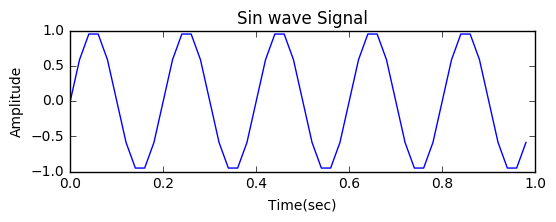

C:\Users\julia\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


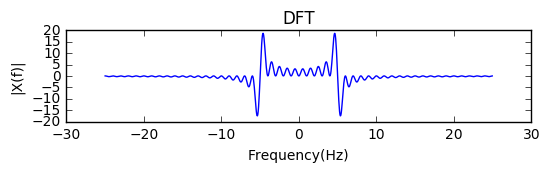

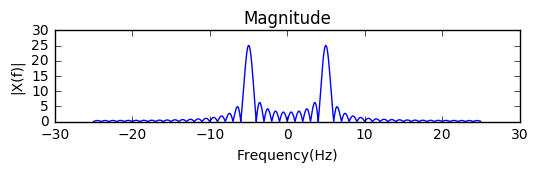

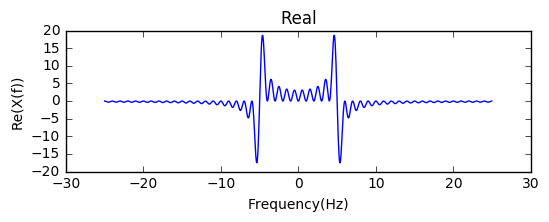

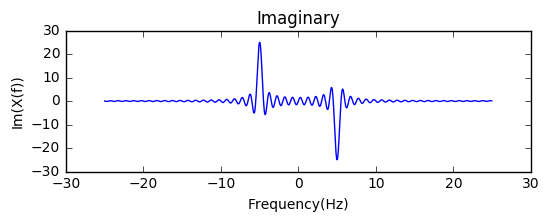

In [2]:
# Signal frequency and sampling frequency
f = 5.
fs = 50.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# sin wave 
x_n = np.sin(2*np.pi*f*t)
# Number of samples 
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_n, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n)
plt.title('Sin wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()


**1.2** Compute the DFT of a cosine wave, how that differs from that of a sine wave ?

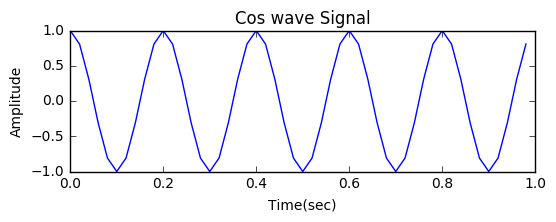

C:\Users\julia\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


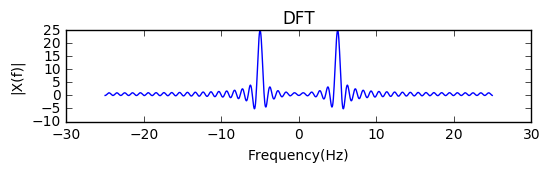

In [4]:
# cos wave 
x_cos = np.cos(2*np.pi*f*t)
# Number of samples 
N = 1000
# frequency vector
fr_cos = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_cos_f = np.fft.fftshift(np.fft.fft(x_cos, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_cos)
plt.title('Cos wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr_cos, x_cos_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

**1.3** Use square wave using the same frequncy and sampling frequency.

Note use `signal.square` to create your signal. 

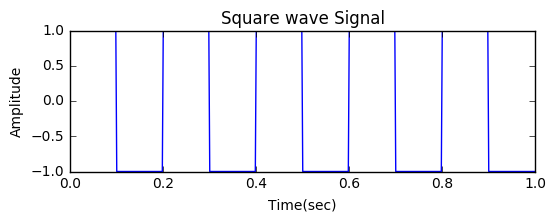

C:\Users\julia\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


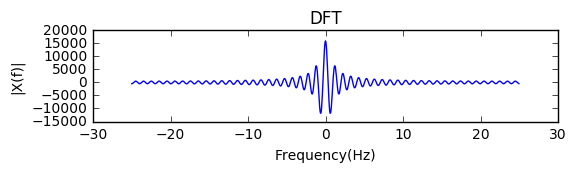

In [16]:
from scipy.signal import square


# Signal frequency and sampling frequency
f = 5.
fs = 50.
# time vector for one second
t = np.linspace(0, 1, 500, endpoint=False)
#  square wave 
sig = signal.square(2 * np.pi * f * t)
# frequency vector
fr_sqr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_sqr_f = np.fft.fftshift(np.fft.fft(x_sqr, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, sig)
plt.title('Square wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr_sqr, x_sqr_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

**1.4** Use white Gaussian noise N = 10000. 

(Note use `np.random.normal` to create your noise) 

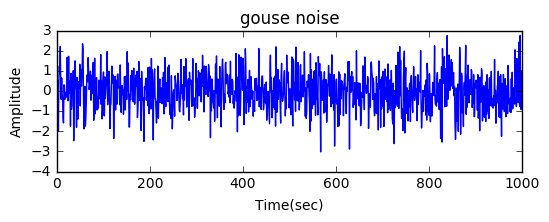

C:\Users\julia\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


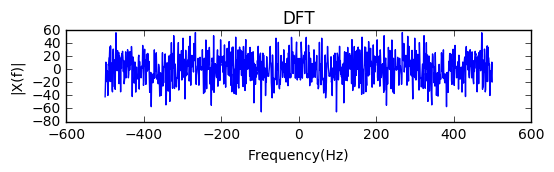

In [26]:

mu, sigma = 0, 1. # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

fr_gaus = (np.arange(-N/2,N/2,1)) 
# DFT 
# Using fftshift to have the center frequency 
x_gaus_f = np.fft.fftshift(np.fft.fft(s, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(s)
plt.title('gause noise')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr_gaus, x_gaus_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()


## Exercise 2 -  Sampling 

Generate and display the following signals of 1 sec duration.
$$x[n] = 3 cos(2\pi\frac{f_{1}}{f_{s}}n) + 4 sin(2\pi\frac{f_{2}}{f_{s}}n)$$
for $f_{1} = 5$ Hz and $f_{2} = 20$ Hz, sampled with the sampling frequencies of $f_{s} = [10, 20, 25, 40, 50, 100, 150]$


**2.1** Plot $x[n]$ for different sampling frequencies in time domain.

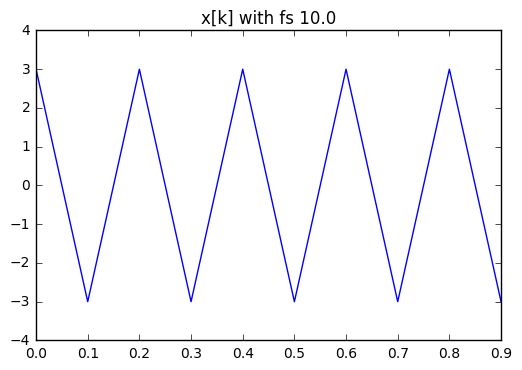

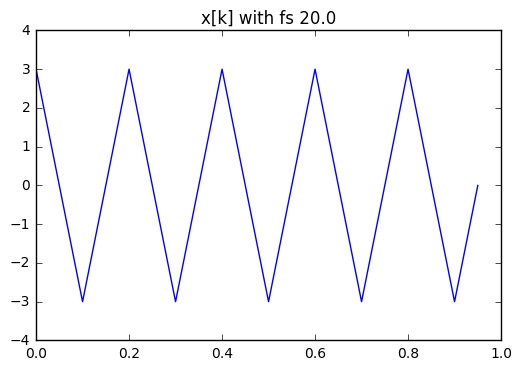

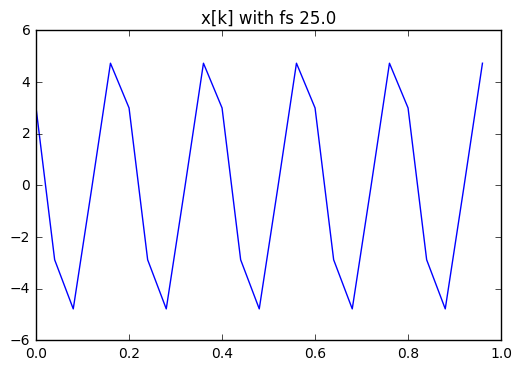

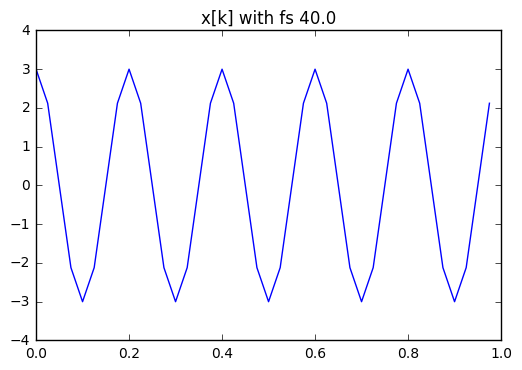

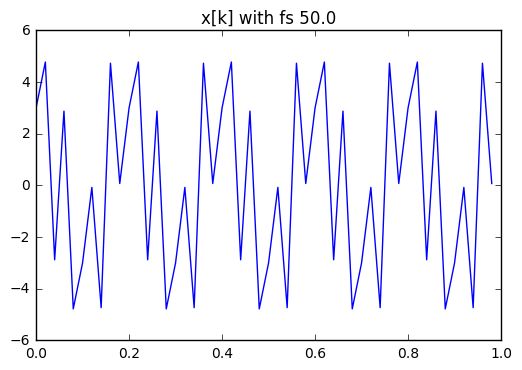

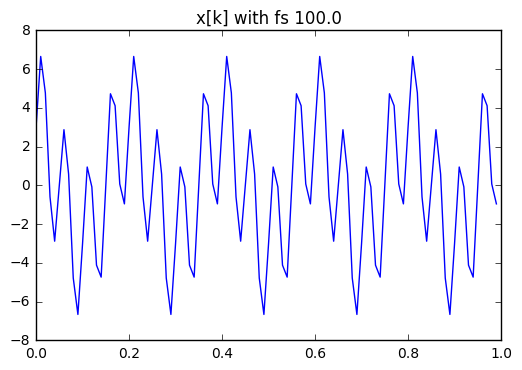

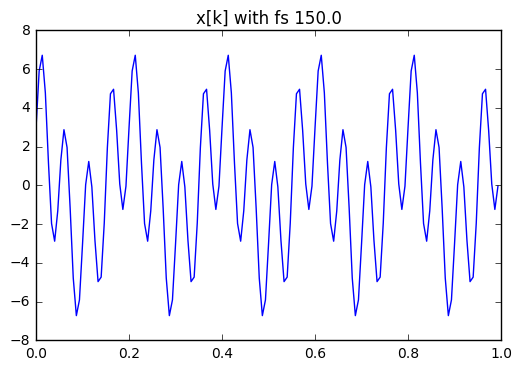

In [53]:
f1 = 5
f2 = 20
fs = [10., 20., 25., 40., 50., 100., 150.]
plt.figure
k = 1;
for i in fs:
    t = np.arange(0, 1., 1./i)
    x = 3 * np.cos (2* np.pi * f1 * t) + 4 * np.sin (2* np.pi * f2 * t)
    plt.plot(t, x)
    plt.title('x[k] with fs {}'.format(i))
    plt.show()

**2.2.** Discuss the aliasing effects in the time domain:

**2.3** Compute the FFT of the above signals and display their centered frequency components.
Discuss your observations.

C:\Users\julia\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


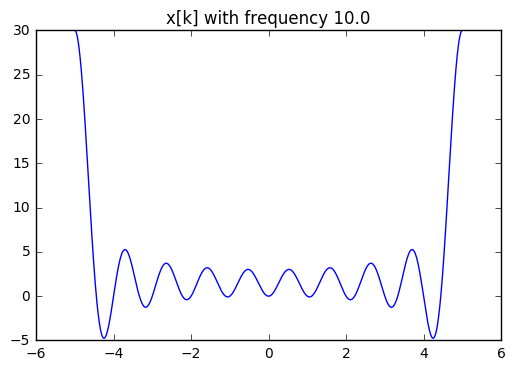

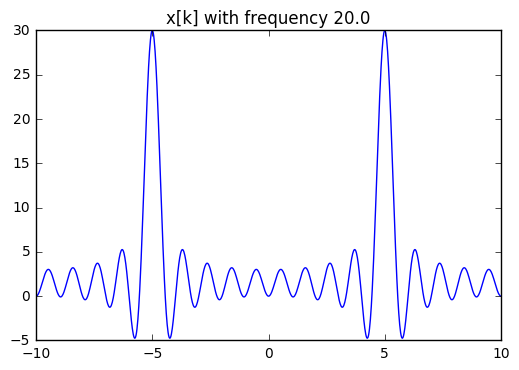

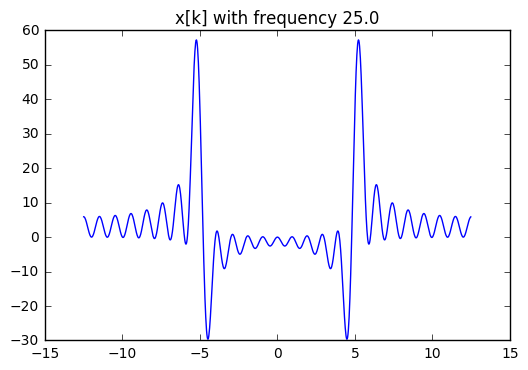

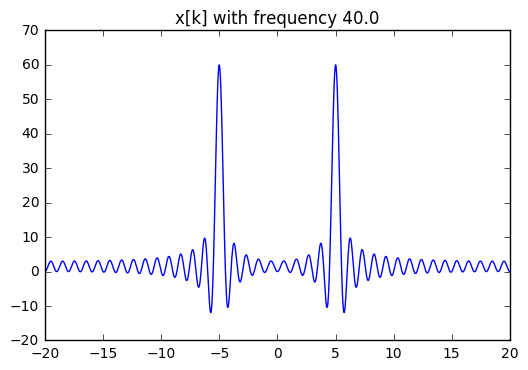

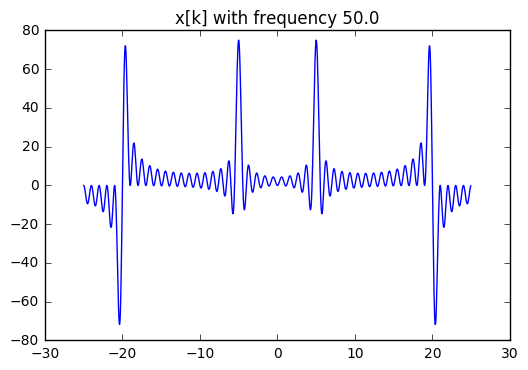

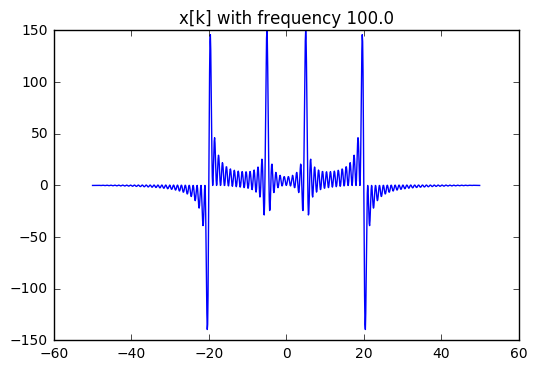

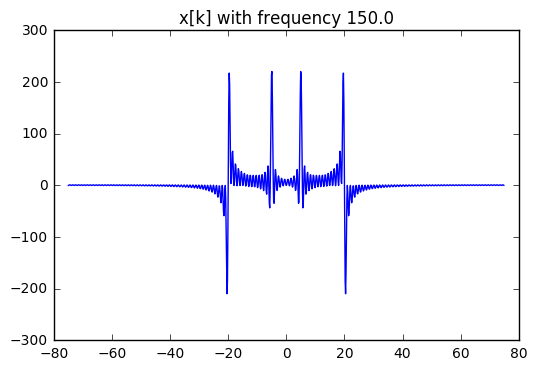

In [54]:
plt.figure
k = 1;
for i in fs:
    t = np.arange(0, 1., 1./i)
    x = 3 * np.cos (2* np.pi * f1 * t) + 4 * np.sin (2* np.pi * f2 * t)
    N=1000
    x_k= np.fft.fftshift(np.fft.fft(x, N))
    fr = (np.arange(-N/2,N/2,1)) * i/N
    plt.plot(fr, x_k)
    plt.title('x[k] with frequency {}'.format (i))
    plt.show()
    

In [ ]:
We can see that in x[n] in time domain we can see two signals after 40 Hz, before it just one function (sin).
And in fft we can see that second component appear only after 50 HZ (we have two piks in 5 and 20) wich means that the 
graph  display two sigmals (sin and cos)

## Exercise 3 - 1D  DFT for image classification

1D DFT can be applied to analyze the frequency components along the one dimensional profile of an image. Here we want to use these information to classify the images into two different classes (**barcode** and **non-barcode** classes)
To do so we first 
* Load the images from 1D-DFT folder
    * **3.1** you have to normalize and resize the images to the smallest size 
    * **3.2** Take 1D profile as shown in the example and compute its DFT.
![](profile1.png)
    
    * **3.3** Separate the images to two different groups of **barcode** and **non-barcode** based on their frequency spectrum of their profile 
* Some information regarding the images:
    * There are 54 images while Images [1, 2, 6, 44:54] are barcode images and the others are similar patterns.
    
**3.4** Discuss your results

In [8]:
Path = '../images/1D-DFT/'
import os, os.path
from skimage import color
from scipy import misc


filenames = sorted([f for f in os.listdir(Path)])

for f in filenames:
    Img = io.imread(os.path.join(Path,f))
    